In [1]:
import os
import pandas as pd
import itertools
import networkx as nx
import financial_data_api as fd
import numpy as np
import matplotlib.pyplot as plt 

financial_data = fd.FinancialData()

In [2]:
def read_articles_from_disk(data_directories):
    counter = 0
    articles = []
    for directory in data_directories: 
        file_list = os.listdir(directory)
        files_to_read = [os.path.join(directory, file) for file in file_list]
        for file in files_to_read: 
            with open(file, 'r') as content_file:
                content = content_file.read()
                articles.append(content)
    return articles

In [3]:
def get_paths_from_tickers(tickers):
    root_data_dir = 'article_data'
    data_directories = [os.path.join(root_data_dir, t) for t in tickers]
    return data_directories

In [4]:
def get_articles_for_tickers(tickers):
    path_names = get_paths_from_tickers(tickers)
    articles = read_articles_from_disk(path_names)
    return set(articles)

In [5]:
def get_sp500_list():
    companies = [s for s in pd.read_csv('constituents.csv', header=0)['Symbol']]
    companies.remove('A')
    companies.remove('T')
    companies.remove('GOOG')
    return companies

In [6]:
def get_company_set(article, tickers):
    words_found = set([])
    ticker_set = set(tickers)
    article = article.split()
    for word in article:
        if word in ticker_set: 
            words_found.add(word)
    return words_found

def get_occurrence_dict(articles):
    counts_dict = {}
    article_counter = 0
    for a in all_articles:
        company_set = get_company_set(a, sp_500_list)
        pairs = itertools.combinations(company_set, 2)
        pairs = set([tuple(sorted(list(p))) for p in pairs])
        for p in pairs: 
            if p not in counts_dict:
                counts_dict[p] = 0
            counts_dict[p] += 1
    return counts_dict   

In [7]:
def get_k_closest_neighbors(company_graph, node_source, num_neighbors):
    neighbors = nx.shortest_path_length(company_graph, source=node_source, weight='weight')
    nearest = []
    counter = 0
    for n in neighbors:
        nearest.append(n)
        if counter == num_neighbors:
            break
        counter += 1
    return nearest[1:]

In [8]:
def get_financial_metric_dict(tickers, metric):
    result_dict = {}
    for t in tickers: 
        data = financial_data.get_quarterly_data(t)
        if t not in result_dict:
            if data:
                result_dict[t] = float(data[metric])
    return result_dict

In [9]:
tickers = ['AAPL']
tickers = ['BA', 'AAPL', 'GOOGL', 'CVX', 'MSFT', 'NFLX', 'XOM', 'GS', 'CAT', 'MMM', 'KO', 'DOW', 'HD', 'CSCO', 'AXP', 'TRV', 'MRK', 'UNH', 'PFE', 'NKE', 'MCD', 'JPM', 'JNJ', 'INTC', 'IBM']

all_articles = get_articles_for_tickers(tickers)
sp_500_list = get_sp500_list()

In [10]:
co_occurrence_dict = get_occurrence_dict(all_articles)
node_set = set([])
for pair in co_occurrence_dict:
    node_set.add(pair[0])
    node_set.add(pair[1])

In [11]:
co_occurrence_graph = nx.Graph()
co_occurrence_graph.add_nodes_from(list(node_set))

max_score = max([v for v in co_occurrence_dict.values()])

for pair, score in co_occurrence_dict.items():
    company_A = pair[0]
    company_B = pair[1]
    co_occurrence_graph.add_edge(company_A, company_B, weight=(1 - (score/max_score)))

In [12]:
k = 10

In [13]:
ebit_data = get_financial_metric_dict(node_set, 'EPS Growth')

In [14]:
results = []
n_dict = {}
for node in co_occurrence_graph.nodes():
    neighbors = get_k_closest_neighbors(co_occurrence_graph, node, k)
    neighbor_stats = []
    n_dict[node] = neighbors

    
    
    for n in neighbors: 
        if n in ebit_data:
            neighbor_stats.append(ebit_data[n])
    deviation = np.std(neighbor_stats)
    results.append((node, deviation))

In [17]:
results

[('EQT', 0.8947892688225535),
 ('RHT', 1.2601192969318422),
 ('ALXN', 0.6928951341292563),
 ('GGP', 0.7537913879184346),
 ('AES', 0.43214177025601214),
 ('DXC', 1.7271784814836018),
 ('PDCO', 1.1252098223886957),
 ('OXY', 0.6705510652523872),
 ('CL', 0.5177218901645512),
 ('SPG', 1.010254519861208),
 ('AVY', 0.9976427138008878),
 ('VZ', 0.3787873652855913),
 ('MHK', 0.9025252090108066),
 ('AMP', 0.48981379481773485),
 ('PNW', 0.3864854099445411),
 ('TRIP', 0.5296486741460714),
 ('MAC', 0.5224592469191812),
 ('EQIX', 16.119044849295506),
 ('TRV', 7.024244907924268),
 ('XYL', 0.46654071890886434),
 ('GWW', 0.32166790017034647),
 ('AFL', 0.1939061061441852),
 ('COTY', 0.6576306310639585),
 ('O', 0.45915125666821394),
 ('MSFT', 0.5047448568336284),
 ('BA', 1.2016387663936279),
 ('BAX', 0.5956637407128286),
 ('HUM', 0.3839730568608451),
 ('TSN', 0.44003246527955187),
 ('NLSN', 0.2093676051828458),
 ('MCK', 1.1108113859074944),
 ('JPM', 0.38097077328845064),
 ('KIM', 2.282287860897481),
 ('J

In [15]:
n_dict['VZ']

['AAPL', 'AMZN', 'GOOGL', 'TRV', 'CAT', 'MMM', 'KO', 'INTC', 'NFLX', 'PG']

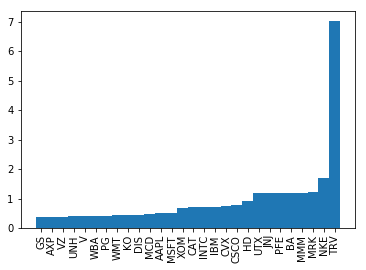

In [16]:
inspect_set = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JBM',
'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'WBA', 'DIS']


top = sorted([r for r in results if r[0] in inspect_set], key=lambda x:x[1])

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels, rotation='vertical') #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(ys)

plt.savefig('netscore.png')


In [20]:
sorted(top, key=lambda x:x[0])

[('AAPL', 0.4937663856521624),
 ('AXP', 0.37675415870299295),
 ('BA', 1.2016387663936279),
 ('CAT', 0.7218305507527373),
 ('CSCO', 0.782537806690514),
 ('CVX', 0.7565636895860124),
 ('DIS', 0.45499400215827024),
 ('GS', 0.36497430991783514),
 ('HD', 0.9157889309224042),
 ('IBM', 0.7255222212999407),
 ('INTC', 0.7221447156906986),
 ('JNJ', 1.175486970961397),
 ('KO', 0.43895920584947296),
 ('MCD', 0.468529766823838),
 ('MMM', 1.2035590580025561),
 ('MRK', 1.2372282695202206),
 ('MSFT', 0.5047448568336284),
 ('NKE', 1.703135850424152),
 ('PFE', 1.1929964538505553),
 ('PG', 0.42394182914640544),
 ('TRV', 7.024244907924268),
 ('UNH', 0.4029937361275293),
 ('UTX', 1.1722422941098822),
 ('V', 0.41604948275415515),
 ('VZ', 0.3787873652855913),
 ('WBA', 0.42375890893289786),
 ('WMT', 0.43503153506383874),
 ('XOM', 0.6774626841383959)]